In [ ]:
from google.colab import files
uploaded = files.upload()

Saving games.csv to games.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Basic Graphical Analysis

In [10]:
df = pd.read_csv('games.csv', low_memory=False)
df.head()

,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination
0,0,Rated Blitz game,0-1,1346,1550,D00,Queen's Pawn Game,Time forfeit
1,1,Rated Classical game,1-0,1591,1377,C41,Philidor Defense #2,Normal
2,2,Rated Blitz game,1-0,1501,1447,C00,French Defense: La Bourdonnais Variation,Normal
3,3,Rated Blitz tournament,1-0,1674,1315,C50,Italian Game,Normal
4,4,Rated Bullet game,1-0,1945,1557,A00,Hungarian Opening,Time forfeit


In [4]:
df = df[df['White Rating'] != '?']
df = df[df['Black Rating'] != '?']
df = df.astype({
    'White Rating': int,
    'Black Rating': int,
})



In [6]:
# create a list of our conditions
df['Avg Rating'] = (df['White Rating'] + df['Black Rating']) / 2
df["Avg Rating"] = pd.to_numeric(df["Avg Rating"])
df["White Wins?"] = np.where(df['Result'] == '1-0', 'yes', 'no')
classes = [
    (df['Avg Rating'] <= 1200),
    (df['Avg Rating'] >= 1201) & (df['Avg Rating'] <= 1400),
    (df['Avg Rating'] >= 1401) & (df['Avg Rating'] <= 1600),
    (df['Avg Rating'] >= 1601) & (df['Avg Rating'] <= 1800),
    (df['Avg Rating'] >= 1801) & (df['Avg Rating'] <= 2000),
    (df['Avg Rating'] >= 2001) & (df['Avg Rating'] <= 2200),
    (df['Avg Rating'] >= 2201) & (df['Avg Rating'] <= 2300),
    (df['Avg Rating'] >= 2301) & (df['Avg Rating'] <= 2400),
    (df['Avg Rating'] >= 2401) & (df['Avg Rating'] <= 2500),
    (df['Avg Rating'] >= 2501) & (df['Avg Rating'] <= 2700),
    (df['Avg Rating'] >= 2701)
    ]

# create a list of the values we want to assign for each condition
values = ['Novices', 'Class D', 'Class C', 'Class B', 'Class A', 'Experts' ,'Candidate Masters', 'Fide Masters', 'International Masters', 'Grand Masters','Super Grandmasters']
df['strengthLevel'] = np.select(classes, values)
df = df[df['strengthLevel'] != '0']
df.head(25)

,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination,Avg Rating,White Wins?,strengthLevel
0,0,Rated Blitz game,0-1,1346,1550,D00,Queen's Pawn Game,Time forfeit,1448.0,no,Class C
1,1,Rated Classical game,1-0,1591,1377,C41,Philidor Defense #2,Normal,1484.0,yes,Class C
2,2,Rated Blitz game,1-0,1501,1447,C00,French Defense: La Bourdonnais Variation,Normal,1474.0,yes,Class C
3,3,Rated Blitz tournament,1-0,1674,1315,C50,Italian Game,Normal,1494.5,yes,Class C
4,4,Rated Bullet game,1-0,1945,1557,A00,Hungarian Opening,Time forfeit,1751.0,yes,Class B
5,5,Rated Bullet game,0-1,1732,1958,B90,"Sicilian Defense: Najdorf Variation, English A...",Time forfeit,1845.0,no,Class A
6,6,Rated Classical game,0-1,1548,1752,C24,Bishop's Opening: Berlin Defense,Normal,1650.0,no,Class B
7,7,Rated Bullet tournament,0-1,1987,1933,C27,Vienna Game,Normal,1960.0,no,Class A
8,8,Rated Bullet game,1-0,1616,1593,A00,Mieses Opening,Normal,1604.5,yes,Class B
9,9,Rated Bullet game,0-1,1213,1330,A04,Zukertort Opening: Quiet System,Time forfeit,1271.5,no,Class D


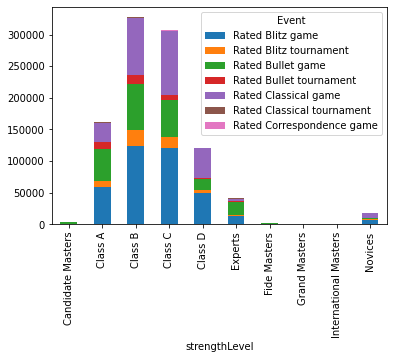

In [7]:

df.groupby(['strengthLevel'])['Event'].value_counts().unstack().plot(kind='bar',stacked = True)



In [8]:
for strength in df['strengthLevel'].unique():
    if(strength != '0'):
      df_event = df[df['strengthLevel'] == strength]
      print(f'White Win Rate for {strength}: ' + str(df_event['White Wins?'].value_counts(normalize=True).mul(100).round(1).values.tolist()[0])+ '%')
      print(f'Top Openings played with  {strength}')
      counts = df_event['Opening'].value_counts()
      percentage = df_event['Opening'].value_counts(normalize=True).mul(100)
      open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
      display(open_stats.head(10))

White Win Rate for Class C: 50.3%
Top Openings played with  Class C


,counts,percentage
Van't Kruijs Opening,9043,2.940010
Horwitz Defense,6628,2.154859
Scandinavian Defense: Mieses-Kotroc Variation,6207,2.017985
Owen Defense,5594,1.818690
French Defense: Knight Variation,5382,1.749766
Modern Defense,5199,1.690270
Philidor Defense #3,4889,1.589484
Sicilian Defense,4757,1.546569
Sicilian Defense: Bowdler Attack,4732,1.538442
Queen's Pawn Game #2,4661,1.515358


White Win Rate for Class B: 50.3%
Top Openings played with  Class B


,counts,percentage
Modern Defense,7014,2.144141
Van't Kruijs Opening,6789,2.075360
Horwitz Defense,6006,1.836001
Scandinavian Defense: Mieses-Kotroc Variation,4953,1.514105
Owen Defense,4808,1.469779
French Defense: Knight Variation,4730,1.445935
Caro-Kann Defense,4657,1.423619
Sicilian Defense: Bowdler Attack,4485,1.371040
Sicilian Defense,4160,1.271689
Hungarian Opening,3669,1.121593


White Win Rate for Class A: 51.1%
Top Openings played with  Class A


,counts,percentage
Modern Defense,3541,2.195003
Van't Kruijs Opening,2853,1.768524
Caro-Kann Defense,2796,1.733190
Horwitz Defense,2676,1.658804
Queen's Pawn,2276,1.410852
Sicilian Defense,2066,1.280676
Hungarian Opening,1914,1.186454
French Defense: Knight Variation,1871,1.159799
Scandinavian Defense: Mieses-Kotroc Variation,1798,1.114548
Owen Defense,1796,1.113308


White Win Rate for Class D: 50.7%
Top Openings played with  Class D


,counts,percentage
Van't Kruijs Opening,4665,3.862746
Horwitz Defense,2725,2.256374
Queen's Pawn Game #2,2510,2.078348
Scandinavian Defense: Mieses-Kotroc Variation,2439,2.019558
Philidor Defense #2,2294,1.899494
Scandinavian Defense,2227,1.844016
Queen's Pawn Game: Chigorin Variation,2145,1.776118
King's Pawn Game: Leonardis Variation,2088,1.728921
Owen Defense,2085,1.726436
King's Pawn Game: Wayward Queen Attack,2051,1.698283


White Win Rate for Experts: 51.2%
Top Openings played with  Experts


,counts,percentage
Modern Defense,1126,2.745270
Nimzo-Larsen Attack,717,1.748098
Old Benoni Defense,579,1.411644
Owen Defense,549,1.338502
Van't Kruijs Opening,543,1.323874
Caro-Kann Defense,518,1.262922
Hungarian Opening,505,1.231227
Queen's Pawn,424,1.033743
Nimzo-Larsen Attack: Classical Variation,398,0.970353
Horwitz Defense,384,0.936220


White Win Rate for Novices: 51.5%
Top Openings played with  Novices


,counts,percentage
Van't Kruijs Opening,827,4.715206
Scandinavian Defense,689,3.928388
King's Pawn Game: Wayward Queen Attack,434,2.474485
Scandinavian Defense: Mieses-Kotroc Variation,387,2.206511
King's Pawn Game: Leonardis Variation,379,2.160899
Horwitz Defense,327,1.864416
Bishop's Opening,324,1.847312
Philidor Defense #2,319,1.818804
Queen's Pawn Game #2,308,1.756086
Queen's Pawn Game: Chigorin Variation,291,1.659160


White Win Rate for Fide Masters: 51.3%
Top Openings played with  Fide Masters


,counts,percentage
Queen's Pawn,39,2.521008
Old Benoni Defense,39,2.521008
Mieses Opening,26,1.680672
Modern Defense,23,1.486749
Kadas Opening,22,1.422107
Scandinavian Defense: Mieses-Kotroc Variation,20,1.292825
Blackmar-Diemer Gambit: Gedult Gambit,19,1.228184
Scandinavian Defense,19,1.228184
Hungarian Opening,19,1.228184
Goldsmith Defense,18,1.163542


White Win Rate for Candidate Masters: 51.2%
Top Openings played with  Candidate Masters


,counts,percentage
Modern Defense,89,2.556002
Hungarian Opening,53,1.522114
Nimzo-Larsen Attack: Classical Variation,49,1.407237
Queen's Pawn,40,1.148765
Polish Defense,40,1.148765
Old Benoni Defense,39,1.120046
Scandinavian Defense: Mieses-Kotroc Variation,37,1.062608
Nimzo-Larsen Attack,33,0.947731
Sicilian Defense: Closed Variation,32,0.919012
Zukertort Opening: Tennison Gambit,31,0.890293


White Win Rate for International Masters: 50.0%
Top Openings played with  International Masters


,counts,percentage
French Defense: Chigorin Variation,14,6.422018
Hungarian Opening: Slav Formation,11,5.045872
Hungarian Opening,10,4.587156
Modern Defense: Standard Defense,8,3.669725
Alekhine Defense: John Tracy Gambit,5,2.293578
Zukertort Opening: Tennison Gambit,5,2.293578
Zukertort Opening: Pirc Invitation,5,2.293578
Robatsch (Modern) Defense,5,2.293578
Modern Defense,5,2.293578
Modern Defense: Three Pawns Attack,5,2.293578


White Win Rate for Grand Masters: 50.9%
Top Openings played with  Grand Masters


,counts,percentage
Hungarian Opening: Catalan Formation,10,18.181818
Robatsch (Modern) Defense,8,14.545455
Nimzo-Larsen Attack,7,12.727273
Hungarian Opening,4,7.272727
Modern Defense,4,7.272727
Zukertort Opening: Kingside Fianchetto,3,5.454545
Hungarian Opening: Symmetrical Variation,3,5.454545
Zukertort Opening: Pirc Invitation,2,3.636364
Zukertort Opening: Nimzo-Larsen Variation,2,3.636364
Hungarian Opening: Indian Defense,2,3.636364


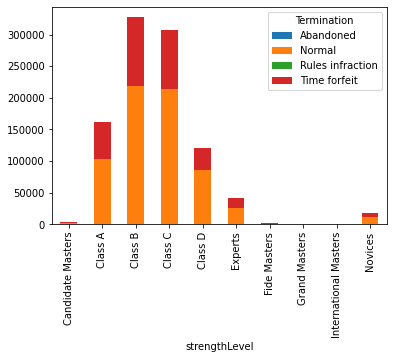

In [9]:

df.groupby(['strengthLevel'])['Termination'].value_counts().unstack().plot(kind='bar',stacked = True)
